**LOADING DATA**

In [1]:
import pandas as pd

iris = pd.read_excel('iris_dataset.xlsx', sheet_name='iris')
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


**PREPROCESSING**
* Removing unnecessary columns
* Removing duplicates if it exist

_when we saved the data in an excel file we forgot to deactivate the auto indexing_

In [2]:
iris.drop(columns='Unnamed: 0', inplace=True)
iris.drop_duplicates(inplace=True)

**EXPLORATORY**

The dataset is devided into 3 classes under the names ***setosa***, ***versicolor*** and ***virginica*** which are categorized by *sepal_length* and *sepal_width*, *petal_length* and *petal_width*

In [3]:
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,49,49,49,49


We used a visualization tool ***seaborn pairplot*** to facilitate getting the difference between each class in the dataset.

*We notice that the two types of flowers (**versicolor**, **virginica**) have quite the same characteristics compared to **setosa** flower, which explains the reason of using an AI model to make the classification of the three kinds*

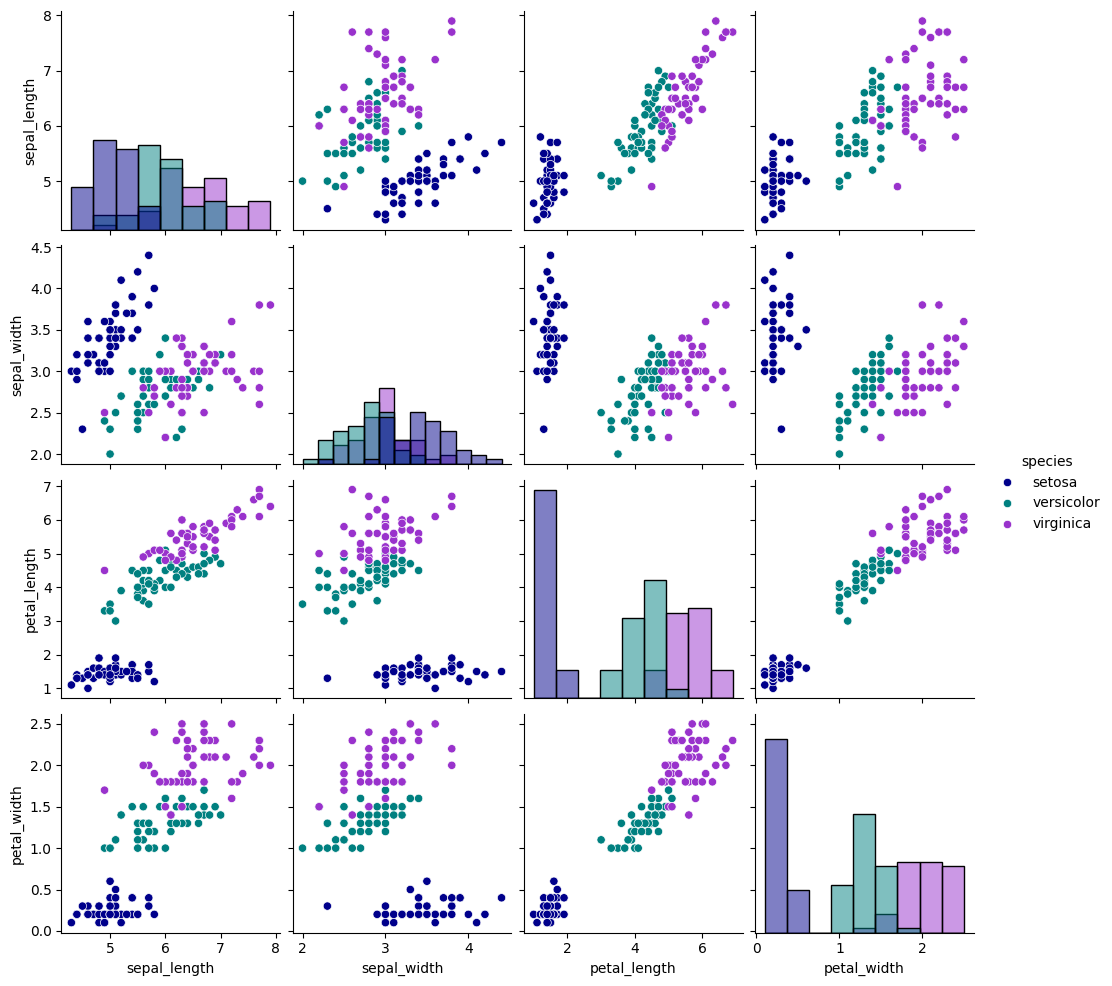

In [4]:
import seaborn as sns

colors = ['darkblue', 'teal', 'darkorchid']
g = sns.pairplot(iris, hue="species", palette=colors, diag_kind="hist", height=2.5)

**PREPARING DATA**

Now we want to split the dataset into training and testing. To do so we have to devide it into _features_ and _targets_ 

In [5]:
X = iris.drop(columns=['species']) 
y = iris['species']

Before going to the train_test_split step we have to normalize the data to improve the model's performance. For that we used ***StandardScaler*** of ***sklearn.preprocessing***

> When we have a big dataset, the values' range won't be the same, so normalizing data will transform it to a common scale

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X) 
X = pd.DataFrame(X)

After removing the targets from features we'll split them into _train models_ and _test models_ using ***train_test_split*** of ***sklearn.model_selection***

> *It's common to use 80% for training and keep the 20% for the test*

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**IMPLEMENTING K-NEAREST NIGHBOR**

We'll start by using KNeighborsClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 96.66666666666667


**(Additional step)** We wanted to see how can the value of _k_ affect the result data so we've chose the k_range from 1 to 100

In [59]:
import numpy as np

error_rate = []
accurarcy_rate = []
k_range = range(1,101)

for i in k_range:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    accurarcy_rate.append(KNN.score(X_test,y_test))

The following graph shows whenever the value of k gets higher, the accurarcy rate fell down which means the model couldn't give us good results. That explains the importance of choosing a best number of neighbors to proceed with the training

Text(0, 0.5, 'Rate')

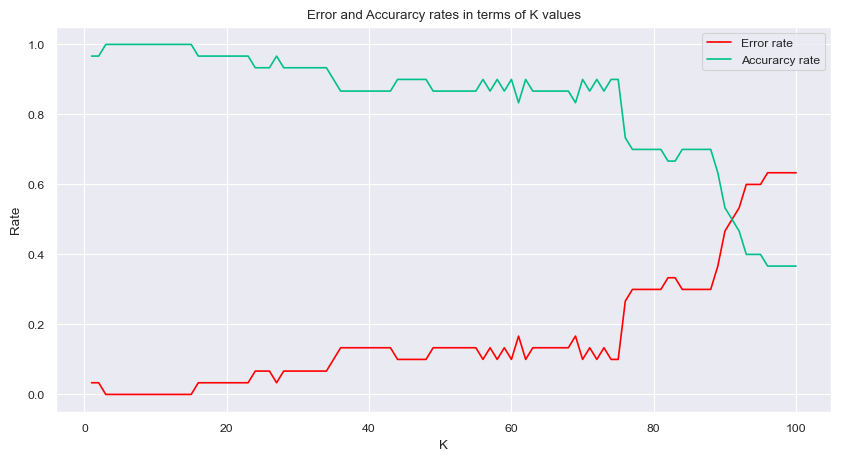

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.set_theme('paper','darkgrid')
    
plt.plot(k_range,error_rate, color='#ff0101')
plt.plot(k_range,accurarcy_rate, color='#00c08d')
plt.legend(['Error rate', 'Accurarcy rate'])
plt.title("Error and Accurarcy rates in terms of K values")
plt.xlabel('K')
plt.ylabel("Rate")

Now we'll implement our own KNN algorithm using the euclidienne distance

In [ ]:
max_indices = [i for i, acc in enumerate(np.max(accurarcy_rate)) if acc == np.max(accurarcy_rate)]
# def distanceE(x, y):
#     result = list()
#     for i in range(X_train.shape[0]):
#         for j in range(X_test.shape[0]):
#             result.append(np.sum(np.abs(X_test.iloc[j].subtract(X_train.iloc[i]))))
#     return np.array(result)

**NEEDS CHANGES**

In [12]:
# def knn_predict(X_train, y_train, X_test, k=3):
#     """Predict class labels for the test data using KNN algorithm."""
#     predictions = []
#     for x in X_test:
#         # Compute distances between the test point and all training points
#         distances = np.linalg.norm(X_train - x, axis=1)
#         # Get the indices of the k nearest neighbors
#         k_indices = np.argsort(distances)[:k]
#         # Extract the labels of the k nearest neighbors
#         k_nearest_labels = [y_train[i] for i in k_indices]
#         # Return the most common class label
#         most_common = Counter(k_nearest_labels).most_common(1)
#         predictions.append(most_common[0][0])
#     return np.array(predictions)

# # Example usage
# if __name__ == "__main__":
#     X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
#     y_train = np.array([0, 0, 0, 1, 1, 1])
#     X_test = np.array([[5, 5], [1, 1]])
    
#     predictions = knn_predict(X_train, y_train, X_test, k=3)
#     print("KNN Predictions:", predictions)